Stock Market using Agglomaretive:

In [1]:
#Importing Necessary packages:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

In [2]:
# A dictionary of 25 'companies_dict' is defined where 'key' is company's name 
#and 'value' is company's stock code. 
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [3]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Stock market data is extracted from yahoo finance for three years (2015-2017).
#The stock movement of companies would be compared based on these 6 parameters 
#:- 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'.
#data_source = 'yahoo' # Source of data is yahoo finance.
import yfinance as yf
start_date = '2019-01-01'
end_date = '2020-12-31'
df = yf.download(list(companies_dict.values()),start_date,end_date)
companies_dict.values()

[*********************100%***********************]  24 of 24 completed


dict_values(['AMZN', 'AAPL', 'WBA', 'NOC', 'BA', 'LMT', 'MCD', 'INTC', 'IBM', 'TXN', 'MA', 'MSFT', 'GE', 'AXP', 'PEP', 'KO', 'JNJ', 'TM', 'HMC', 'XOM', 'CVX', 'VLO', 'F', 'BAC'])

In [5]:
#Numpy arrays are more convenient. So 'stock_open' and 'stock_close' are defined as follows :-
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

In [6]:
#'movement' is defined as difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) 
#and negative movement suggests to short the stock(sell).
movements = stock_close-stock_open

In [7]:
sum_of_movement = np.sum(movements,1)

In [8]:
#The company and its 'sum_of_movement' is printed:
for i in range(len(companies_dict)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:AAPL, Change:45.65492630004883
company:AMZN, Change:83.1590576171875
company:AXP, Change:-3.1598739624023438
company:BA, Change:-169.12044525146484
company:BAC, Change:7.530000686645508
company:CVX, Change:-39.1300048828125
company:F, Change:-3.8300089836120605
company:GE, Change:-22.70151138305664
company:HMC, Change:-5.160017013549805
company:IBM, Change:2.9062347412109375
company:INTC, Change:20.259933471679688
company:JNJ, Change:-13.919937133789062
company:KO, Change:-11.250003814697266
company:LMT, Change:-18.349609375
company:MA, Change:6.51043701171875
company:MCD, Change:4.00030517578125
company:MSFT, Change:39.709991455078125
company:NOC, Change:-12.8299560546875
company:PEP, Change:14.360076904296875
company:TM, Change:-18.719985961914062
company:TXN, Change:35.87995910644531
company:VLO, Change:-37.07999038696289
company:WBA, Change:-30.450027465820312
company:XOM, Change:-39.56996154785156


In [9]:
#Normalization:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.37676890090119125
0.2998906347281705
-0.0005758488392153424


In [10]:
#Plotting Decision Boundaries:
from sklearn.decomposition import PCA
# Reduce the data
X = PCA(n_components = 2).fit_transform(norm_movements)
print(X)


[[-3.84041922e-01 -4.41681763e-01]
 [-4.66813406e-01 -5.25668201e-01]
 [ 3.39612047e-01 -6.85510760e-02]
 [ 2.84804875e-01  2.75393483e-02]
 [ 3.47309304e-01 -2.14790582e-02]
 [ 4.44808302e-01 -1.61413476e-01]
 [ 4.88430449e-01 -6.63723959e-02]
 [ 3.92937831e-01  9.29692836e-02]
 [ 1.15678507e-01  2.99545665e-04]
 [ 4.44787616e-02  1.31370307e-01]
 [-2.40499859e-01 -1.66655440e-01]
 [-3.35150841e-01  3.38154900e-01]
 [-1.95388086e-01  3.54446119e-01]
 [-2.51911992e-01  5.19565858e-01]
 [-1.60001627e-01 -1.91457290e-01]
 [-1.14162914e-01 -8.69851176e-02]
 [-4.55092556e-01 -3.66606834e-01]
 [-2.62084032e-01  5.31315933e-01]
 [-4.12586671e-01  2.58201234e-01]
 [ 4.01379043e-03  1.77514782e-02]
 [-1.95322212e-01 -2.62701296e-01]
 [ 4.80895699e-01 -9.14189324e-02]
 [ 5.29575621e-02  2.62975433e-01]
 [ 4.77128988e-01 -8.35985577e-02]]


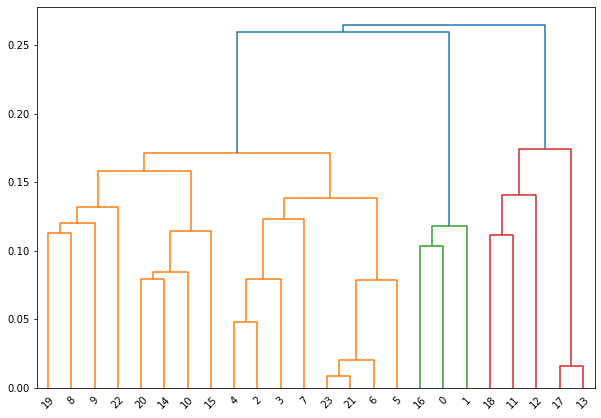

In [11]:
#Dendogram with SIngle Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')


plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([4, 4, 0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 2, 2, 3, 3, 4, 2, 2, 1, 3, 0,
       1, 0])

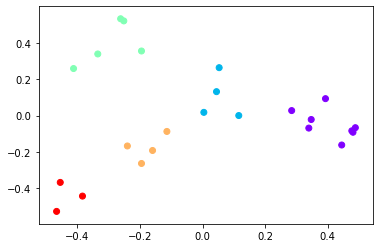

In [13]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [14]:
#Creating pipeline for narmalization and k-means clustering:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import AgglomerativeClustering
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,cluster)
# Fit pipeline to daily stock movements
pipeline.fit_predict(movements)
labels = pipeline.fit_predict(movements)

In [15]:
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict)}).sort_values(by=['labels'],axis = 0)

In [16]:
df1

,labels,companies
11,0,Microsoft
18,0,Honda
17,0,Toyota
12,0,General Electrics
13,0,American Express
2,1,Walgreen
3,1,Northrop Grumman
4,1,Boeing
6,1,McDonalds
7,1,Intel
